In [126]:
import pandas as pd
import numpy as np
from datetime import datetime

cinta = pd.read_excel('Cinta.xlsx', sheet_name='RECIBOSD')


In [127]:
cinta

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8


### Se clasifica si el recibo es nuevo o viejo segun la fecha (se puede tomar otras opciones o traer de la base)

In [128]:
cinta['FACTURACION'] = cinta.apply(lambda x: 'OLD' if x.FENVIO - x.FEMISION > np.timedelta64(30, 'D') else 'NUEVO', axis = 1)
cinta['MENVIO'] = cinta.FENVIO.apply(lambda x:x.strftime('%B'))
cinta.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,FACTURACION,MENVIO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0,NUEVO,January
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,OLD,February
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0,NUEVO,February
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,NUEVO,February
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,NUEVO,February


## Utilizando GroupBy

In [131]:
cosecha2 = cinta.groupby(['PRODUCTO', 'FACTURACION', 'MENVIO'])['MONTO'].\
    agg(['sum', 'count']).\
    rename(columns = {'sum':'MONTO', 'count': 'CANTIDAD'})
cosecha2.head()

MONTO  CANTIDAD
PRODUCTO FACTURACION MENVIO                   
FFULL    NUEVO       February  623.0         2
                     January   123.0         1
         OLD         February  123.0         1
HOG      NUEVO       February   12.8         1

In [132]:
cosecha2['MONTO'].unstack(level=[0,1])

PRODUCTO     FFULL          HOG
FACTURACION  NUEVO    OLD NUEVO
MENVIO                         
February     623.0  123.0  12.8
January      123.0    NaN   NaN

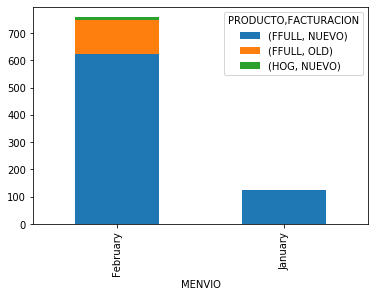

In [133]:
%matplotlib inline
cosecha2['MONTO'].unstack(level=[0,1]).plot(kind = 'bar', stacked = True)

In [134]:
cosecha2['CANTIDAD'].unstack(level=[0,1])

PRODUCTO    FFULL        HOG
FACTURACION NUEVO  OLD NUEVO
MENVIO                      
February      2.0  1.0   1.0
January       1.0  NaN   NaN

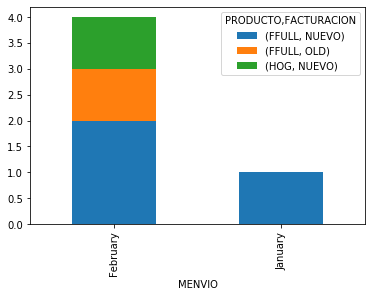

In [135]:
cosecha2['CANTIDAD'].unstack(level=[0,1]).plot(kind = 'bar', stacked = True)

## Utillizando Pivot Table

In [136]:
cinta.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,FACTURACION,MENVIO
0,18,123,2,FFULL,2019-01-03,2019-01-17,123.0,NUEVO,January
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,OLD,February
2,18,123,3,FFULL,2019-02-03,2019-02-17,123.0,NUEVO,February
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,NUEVO,February
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,NUEVO,February


In [137]:
pt = cinta.pivot_table(values = ['MONTO'], index = 'MENVIO', columns = ['PRODUCTO', 'FACTURACION'], aggfunc='sum')
pt

MONTO             
PRODUCTO     FFULL          HOG
FACTURACION  NUEVO    OLD NUEVO
MENVIO                         
February     623.0  123.0  12.8
January      123.0    NaN   NaN

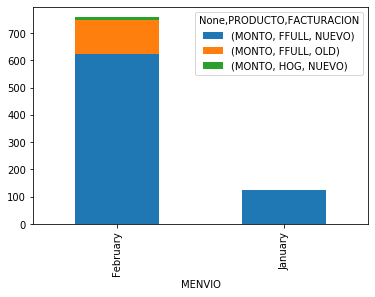

In [138]:
pt.plot(kind = 'bar', stacked = True)

In [143]:
pt.stack(level = [1,2]).unstack(level = 0).head()

MONTO        
MENVIO               February January
PRODUCTO FACTURACION                 
FFULL    NUEVO          623.0   123.0
         OLD            123.0     NaN
HOG      NUEVO           12.8     NaN

## Facturacion

In [230]:
recibos = pd.read_excel('Cinta.xlsx', sheet_name='RECIBOS')
recibos.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,STATUS
0,18,111,2,FFULL,2019-01-04,2019-02-17,1000.0,COBRADO
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,PEND
2,18,123,3,FFULL,2019-02-03,2019-02-17,444.0,COBRADO
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,COBRADO
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,PEND


In [231]:
recibos['MEMISOIN'] = recibos.FEMISION.apply(lambda x:x.strftime('%Y%m'))

In [232]:
recibos.head()

,RAMO,CERTIFICADO,NROCOTA,PRODUCTO,FEMISION,FENVIO,MONTO,STATUS,MEMISOIN
0,18,111,2,FFULL,2019-01-04,2019-02-17,1000.0,COBRADO,201901
1,18,123,2,FFULL,2019-01-03,2019-02-17,123.0,PEND,201901
2,18,123,3,FFULL,2019-02-03,2019-02-17,444.0,COBRADO,201902
3,18,543,15,FFULL,2019-02-14,2019-02-17,500.0,COBRADO,201902
4,1,123,3,HOG,2019-02-10,2019-02-17,12.8,PEND,201902


In [233]:
ptr = recibos.pivot_table(values = ['MONTO'], index = 'MEMISOIN', columns = ['STATUS'], aggfunc='sum')
ptr

MONTO       
STATUS   COBRADO   PEND
MEMISOIN               
201901    1000.0  123.0
201902     944.0   12.8

In [234]:
ptr['TOTAL'] = ptr.apply(sum, axis = 1)

In [235]:
ptr

MONTO          TOTAL
STATUS   COBRADO   PEND        
MEMISOIN                       
201901    1000.0  123.0  1123.0
201902     944.0   12.8   956.8

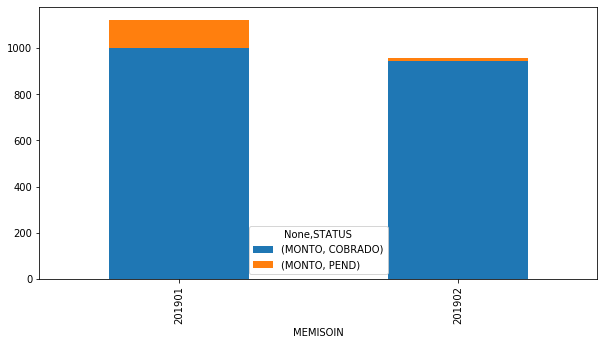

In [239]:
ptr.loc[:,:'MONTO'].plot(kind = 'bar', stacked = True, figsize = (10,5))

In [163]:
recibos.pivot_table(values = ['MONTO'], index = 'MEMISOIN', columns = ['STATUS', 'PRODUCTO'], aggfunc='sum')

MONTO             
STATUS   COBRADO   PEND      
PRODUCTO   FFULL  FFULL   HOG
MEMISOIN                     
February   500.0    NaN  12.8
January    123.0  123.0   NaN

In [241]:
operecibos = pd.read_excel('Cinta.xlsx', sheet_name='OPEREC')
operecibos.head()

,FECHA,RAMO,CERT,OPE,FEMIREC,MONTO
0,2019-01-01,1,1,EMI,2019-01-01,1000
1,2019-01-02,18,2,COB,2019-12-12,1000
2,2019-01-15,32,3,ANU,2019-12-30,950
3,2019-02-03,18,4,EMI,2019-02-03,1000
4,2019-02-10,1,5,COB,2019-01-05,900


In [287]:
operecibos['MNT'] = operecibos.apply(\
                        lambda x: x.MONTO if x.OPE == 'EMI' else -x.MONTO, \
                        axis = 1)

In [256]:
operecibos

,FECHA,RAMO,CERT,OPE,FEMIREC,MONTO,MNT
0,2019-01-01,1,1,EMI,2019-01-01,1000,1000
1,2019-01-02,18,2,COB,2019-12-12,1000,-1000
2,2019-01-15,32,3,ANU,2019-12-30,950,-950
3,2019-02-03,18,4,EMI,2019-02-03,1000,1000
4,2019-02-10,1,5,COB,2019-01-05,900,-900
5,2019-02-20,32,6,ANU,2019-01-10,780,-780
6,2019-03-10,18,7,COB,2019-02-15,1500,-1500
7,2019-03-15,7,8,COB,2019-02-10,900,-900


In [272]:
operecibos.set_index('FECHA').resample('1M').sum()

,RAMO,CERT,MONTO,MNT
FECHA,,,,
2019-01-31,51,6,2950,-950
2019-02-28,51,15,2680,-680
2019-03-31,25,15,2400,-2400


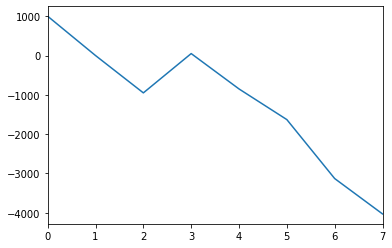

In [281]:
operecibos.MNT.cumsum().plot()

In [282]:
operecibos.pivot_table(values = ['MNT'], \
                       index = pd.Grouper(key = 'FECHA', freq = '1M'), \
                       columns = ['OPE'], aggfunc='sum')

MNT                
OPE           ANU     COB     EMI
FECHA                            
2019-01-31 -950.0 -1000.0  1000.0
2019-02-28 -780.0  -900.0  1000.0
2019-03-31    NaN -2400.0     NaN